In [4]:
import pandas as pd
from Main import Graph
from Connect import Neo4jConnection
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
neo4j_conn = Neo4jConnection(
    uri="neo4j+s://ef6a4b43.databases.neo4j.io",
    user="neo4j",
    pwd="NGc-axA6NfD4lLYYgOS6EuxlNK-Fi8MrV41-bQep68I"
)

In [ ]:
graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    graph.add_vertex(v)

In [12]:
edges = [
    ('A', 'B', 4),
    ('A', 'C', 1),
    ('C', 'B', 2),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('D', 'E', 6)
]

In [13]:
for from_data, to_data, weight in edges:
    graph.add_edge(from_data, to_data, weight)

In [6]:
graph.save_graph_to_neo4j()

In [7]:
df_result = graph.dijkstra('A')
df_result

,Current Node,Visited Nodes,Distances
0,A,[A],"{'A': 0, 'B': 4, 'C': 1, 'D': inf, 'E': inf}"
1,C,"[A, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 9, 'E': inf}"
2,B,"[A, B, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': inf}"
3,D,"[A, B, C, D]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"
4,E,"[A, B, C, D, E]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"


In [8]:
# Tìm đường đi ngắn nhất từ A đến E
path = []
current_vertex = graph.vertices['E']
while current_vertex:
    path.insert(0, current_vertex.data)
    current_vertex = current_vertex.previous

# Lưu đường đi ngắn nhất vào Neo4j
graph.save_shortest_path_to_neo4j(path)

# Xây dựng danh sách các cạnh của đường đi ngắn nhất
shortest_path_edges = []
for i in range(len(path) - 1):
    shortest_path_edges.append((path[i], path[i+1]))

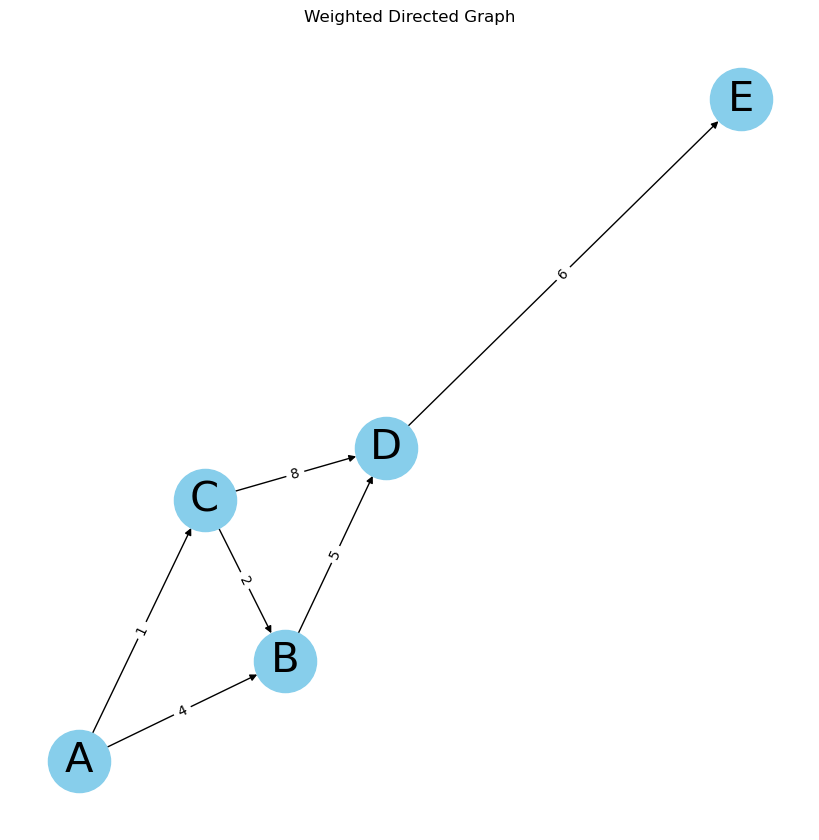

In [9]:
# Vẽ đồ thị ban đầu
plt.figure(figsize=(8, 8))
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Vị trí các nút trong đồ thị
pos = nx.spring_layout(G)

# Vẽ nút và cạnh của đồ thị ban đầu
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị ban đầu
plt.title("Weighted Directed Graph")
plt.show()

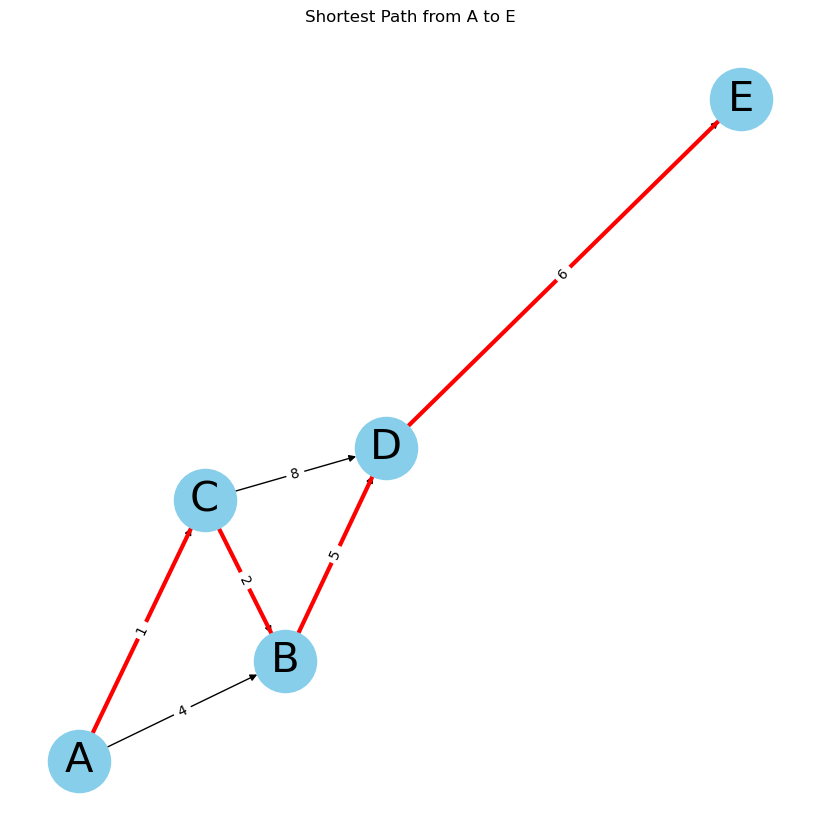

Shortest path from A to E: A -> C -> B -> D -> E


In [10]:
# Vẽ lại đồ thị với đường đi ngắn nhất nổi bật
plt.figure(figsize=(8, 8))

# Vẽ nút và cạnh của đồ thị
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)

# Vẽ các cạnh của đường đi ngắn nhất với màu sắc khác
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='r', width=3)

# Vẽ nhãn cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị với đường đi ngắn nhất
plt.title("Shortest Path from A to E")
plt.show()

# In ra đường đi ngắn nhất
print("Shortest path from A to E:", " -> ".join(path))

In [ ]:
# 1. Euler Circuit Demonstration

euler_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D']:
    euler_graph.add_vertex(v)

euler_edges = [
    ('A', 'B', 1),
    ('B', 'C', 1),
    ('C', 'D', 1),
    ('D', 'A', 1),
    ('A', 'C', 1),
    ('B', 'D', 1)
]

# Find Euler Circuit
euler_result = euler_graph.fleury_algorithm()
print("Euler Circuit Result:")
print(euler_result)

# Visualize Euler graph and circuit
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(121)
G_euler = nx.Graph()
G_euler.add_weighted_edges_from(euler_edges)
pos_euler = nx.spring_layout(G_euler)
nx.draw(G_euler, pos_euler, with_labels=True, node_color='skyblue', 
        node_size=2000, font_size=30)
plt.title("Original Graph")

# Euler Circuit
plt.subplot(122)
if isinstance(euler_result, pd.DataFrame):
    G_euler_path = nx.Graph()
    euler_path_edges = []
    for i in range(len(euler_result)):
        current = euler_result.iloc[i]['Current Vertex']
        next_vertex = euler_result.iloc[i]['Next Vertex']
        euler_path_edges.append((current, next_vertex))
    
    G_euler_path.add_edges_from(euler_path_edges)
    nx.draw(G_euler_path, pos_euler, with_labels=True, 
            node_color='skyblue', node_size=2000, font_size=30,
            edge_color='r', width=2, arrows=True)
    plt.title("Euler Circuit")

plt.show()


In [ ]:
# 2. Hamiltonian Path Demonstration
hamilton_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    hamilton_graph.add_vertex(v)

hamilton_edges = [
    ('A', 'B', 1),
    ('B', 'C', 1),
    ('C', 'D', 1),
    ('D', 'E', 1),
    ('A', 'C', 1),
    ('B', 'D', 1),
    ('C', 'E', 1)
]

for from_data, to_data, weight in hamilton_edges:
    hamilton_graph.add_edge(from_data, to_data, weight)

# Save Hamilton graph to Neo4j
hamilton_graph.save_graph_to_neo4j()

# Find Hamiltonian Path
hamilton_result = hamilton_graph.hamiltonian_path()
print("\nHamiltonian Path Result:")
print(hamilton_result)

# Visualize Hamilton graph and path
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(121)
G_hamilton = nx.Graph()
G_hamilton.add_weighted_edges_from(hamilton_edges)
pos_hamilton = nx.spring_layout(G_hamilton)
nx.draw(G_hamilton, pos_hamilton, with_labels=True, 
        node_color='skyblue', node_size=2000, font_size=30)
plt.title("Original Graph")

# Hamiltonian Path
plt.subplot(122)
if isinstance(hamilton_result, pd.DataFrame):
    final_path = hamilton_result.iloc[-1]['Current Path']
    hamilton_path_edges = [(final_path[i], final_path[i+1]) 
                          for i in range(len(final_path)-1)]
    
    G_hamilton_path = nx.Graph()
    G_hamilton_path.add_edges_from(hamilton_path_edges)
    nx.draw(G_hamilton_path, pos_hamilton, with_labels=True, 
            node_color='skyblue', node_size=2000, font_size=30,
            edge_color='r', width=2, arrows=True)
    plt.title("Hamiltonian Path")

plt.show()

In [2]:

def visualize_graph(graph, edges, title):
    """Hàm hỗ trợ để vẽ đồ thị."""
    plt.figure(figsize=(8, 8))
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    plt.title(title)
    plt.show()
    
def visualize_colored_graph(graph, coloring_result, title):
    """Hàm hỗ trợ để vẽ đồ thị đã tô màu."""
    plt.figure(figsize=(8, 8))
    G = nx.Graph()
    for vertex, neighbors in graph.vertices.items():
        for neighbor, weight in neighbors.adjacent.items():
            G.add_edge(vertex, neighbor.data)
    pos = nx.spring_layout(G)
    color_map = [coloring_result[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.rainbow, node_size=2000, font_size=15)
    plt.title(title)
    plt.show()

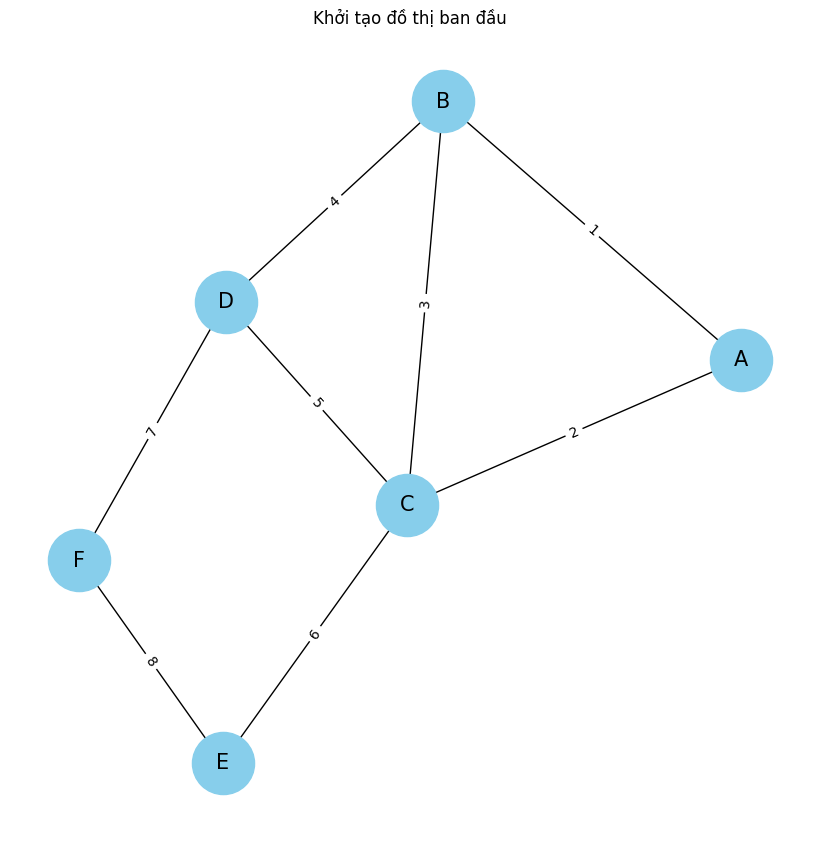


Cây khung nhỏ nhất của đồ thị tìm bởi thuật toán Prim:
[('A', 'B', 1), ('A', 'C', 2), ('B', 'D', 4), ('C', 'E', 6), ('D', 'F', 7)]


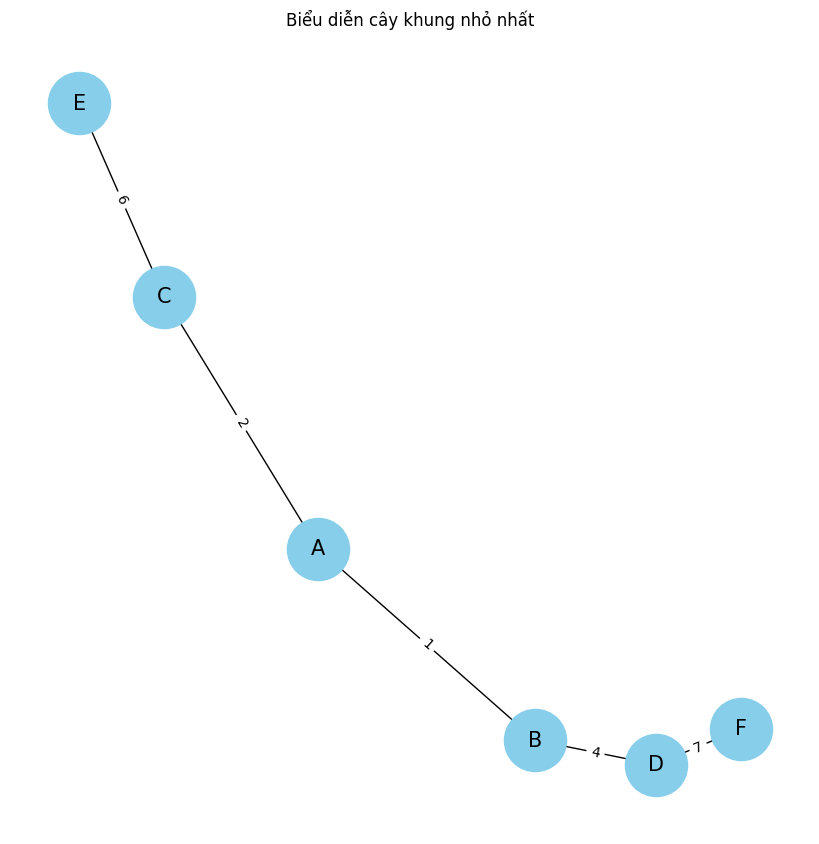


Cây khung nhỏ nhất của đồ thị tìm bởi thuật toán Kruskal:
[('A', 'B', 1), ('A', 'C', 2), ('B', 'D', 4), ('C', 'E', 6), ('D', 'F', 7)]


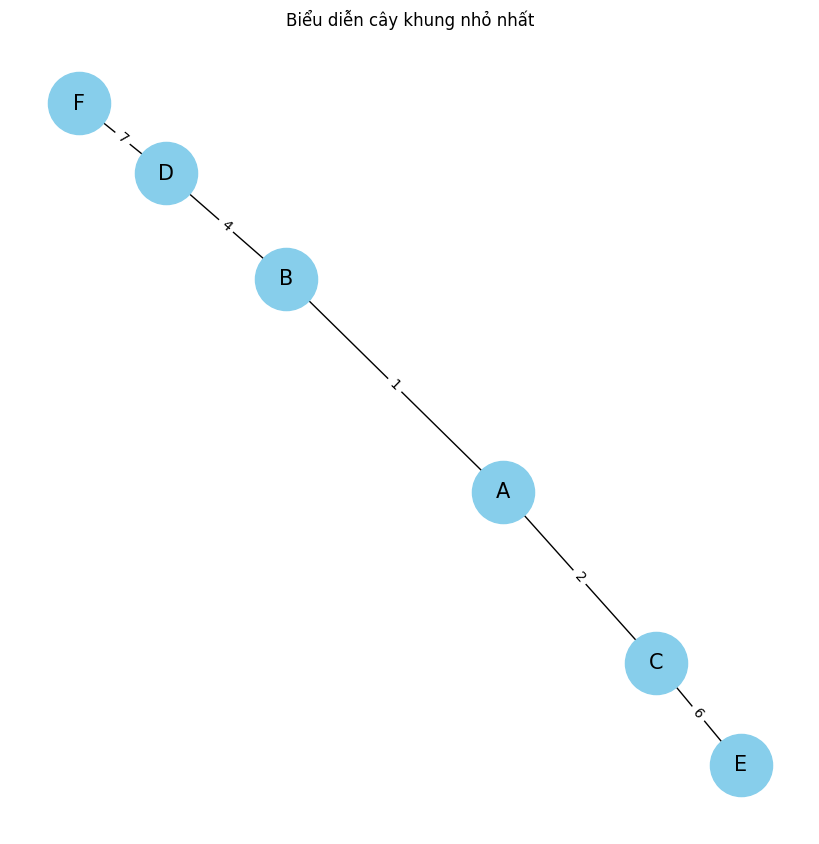

In [3]:
# **Phần 4: Tìm cây khung nhỏ nhất**
# Create the graph
graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E', 'F']:
    graph.add_vertex(v)

edges = [
    ("A", "B", 1), ("A", "C", 2), ("B", "C", 3), ("B", "D", 4), 
    ("C", "D", 5), ("C", "E", 6), ("D", "F", 7), ("E", "F", 8)
]

for from_data, to_data, weight in edges:
    graph.add_edge(from_data, to_data, weight)

# Save graph to Neo4j
graph.save_graph_to_neo4j()

# Find MST using Prim's Algorithm
prim_result = graph.prim_algorithm()
print("\nPrim's Algorithm Steps:")
print(prim_result)

# Find MST using Kruskal's Algorithm
kruskal_result = graph.kruskal_algorithm()
print("\nKruskal's Algorithm Result:")
print(kruskal_result)

# Visualize the results
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(131)
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Original Graph")

# Prim's MST
plt.subplot(132)
G_prim = nx.Graph()
if isinstance(prim_result, pd.DataFrame):
    prim_edges = []
    for _, row in prim_result.iterrows():
        if 'Current Tree' in row:
            prim_edges = row['Current Tree']
    G_prim.add_weighted_edges_from(prim_edges)
    nx.draw(G_prim, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
    nx.draw_networkx_edge_labels(G_prim, pos, edge_labels=nx.get_edge_attributes(G_prim, 'weight'))
plt.title("MST (Prim's)")

# Kruskal's MST
plt.subplot(133)
G_kruskal = nx.Graph()
G_kruskal.add_weighted_edges_from(kruskal_result)
nx.draw(G_kruskal, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G_kruskal, pos, edge_labels=nx.get_edge_attributes(G_kruskal, 'weight'))
plt.title("MST (Kruskal's)")

plt.show()

# Print the total weight of both MSTs
prim_weight = sum(weight for _, _, weight in prim_edges)
kruskal_weight = sum(weight for _, _, weight in kruskal_result)
print(f"\nTotal weight of Prim's MST: {prim_weight}")
print(f"Total weight of Kruskal's MST: {kruskal_weight}")

In [5]:
# **Phần 5: Tô màu đồ thị bản đồ**
# Create map graph
map_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E', 'F']:
    map_graph.add_vertex(v)

# Add edges (adjacent regions)
map_edges = [
    ("A", "B", 1), ("A", "C", 1), ("A", "D", 1),
    ("B", "C", 1), ("B", "D", 1), ("B", "E", 1),
    ("C", "E", 1), ("C", "F", 1), ("D", "E", 1),
    ("D", "F", 1)
]

for from_data, to_data, weight in map_edges:
    map_graph.add_edge(from_data, to_data, weight)

# Save map graph to Neo4j
map_graph.save_graph_to_neo4j()

# Find graph coloring
coloring_result = map_graph.graph_coloring()
print("\nGraph Coloring Result:")
print(coloring_result)

# Visualize colored graph
plt.figure(figsize=(8, 8))
G = nx.Graph()
G.add_weighted_edges_from(map_edges)
pos = nx.spring_layout(G)

# Get final coloring from the last row of the result
final_coloring = coloring_result.iloc[-1]['Current Coloring']
node_colors = [final_coloring[node] for node in G.nodes()]

# Draw the colored graph
nx.draw(G, pos, with_labels=True, 
        node_color=node_colors, 
        node_size=2000, 
        font_size=30, 
        cmap=plt.cm.rainbow)
plt.title("Map Coloring")
plt.show()

# Print the color assignments
print("\nColor assignments for each region:")
for region, color in final_coloring.items():
    print(f"Region {region}: Color {color}")


Unable to retrieve routing information


ServiceUnavailable: Unable to retrieve routing information